# Gibbs Sampling for a Bivariate Normal Distribution

This notebook demonstrates Gibbs sampling for a bivariate normal distribution. It visualizes the trace plots, the joint distribution, and shows how the sample mean and covariance converge to the theoretical values.

**Concept:**
- Gibbs sampling is an MCMC method for sampling from a joint distribution when the conditional distributions are known and easy to sample from.
- For a bivariate normal, the conditional distributions are also normal, so Gibbs sampling is efficient and exact.

## 1. Import Required Libraries and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

# Add the project root directory to the Python path
current_dir = os.getcwd()
if os.path.basename(current_dir) == 'notebooks':
    project_root = os.path.abspath(os.path.join(current_dir, '..'))
else:
    project_root = current_dir
if project_root not in sys.path:
    sys.path.insert(0, project_root)

try:
    from src.mcmc.gibbs_sampling import gibbs_sampler_bivariate_normal
    print("Successfully imported gibbs_sampler_bivariate_normal from src")
except ImportError as e:
    print(f"Error importing gibbs_sampler_bivariate_normal: {e}")
    print("Please ensure you are running this notebook from the 'learn_statistics' root directory or the 'notebooks' subdirectory.")

Successfully imported gibbs_sampler_bivariate_normal from src


## 2. Set Parameters for the Bivariate Normal and Sampler

In [2]:
# Target distribution parameters
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1
rho = 0.8

# Sampler parameters
num_samples = 10000
burn_in = 1000

print(f"Target mean: ({mu1}, {mu2}), std: ({sigma1}, {sigma2}), correlation: {rho}")
print(f"Sampler: num_samples={num_samples}, burn_in={burn_in}")

Target mean: (0, 0), std: (1, 1), correlation: 0.8
Sampler: num_samples=10000, burn_in=1000


## 3. Run the Gibbs Sampler

In [3]:
samples = gibbs_sampler_bivariate_normal(mu1, mu2, sigma1, sigma2, rho, num_samples, burn_in)
print(f"Generated {samples.shape[0]} samples after burn-in.")
print(f"Sample mean: {np.mean(samples, axis=0)}")
print(f"Sample covariance matrix:\n{np.cov(samples, rowvar=False)}")

Generated 9000 samples after burn-in.
Sample mean: [-0.00176013 -0.00701235]
Sample covariance matrix:
[[0.98301516 0.77703805]
 [0.77703805 0.97249854]]


## 4. Visualize Trace Plots and Joint Distribution

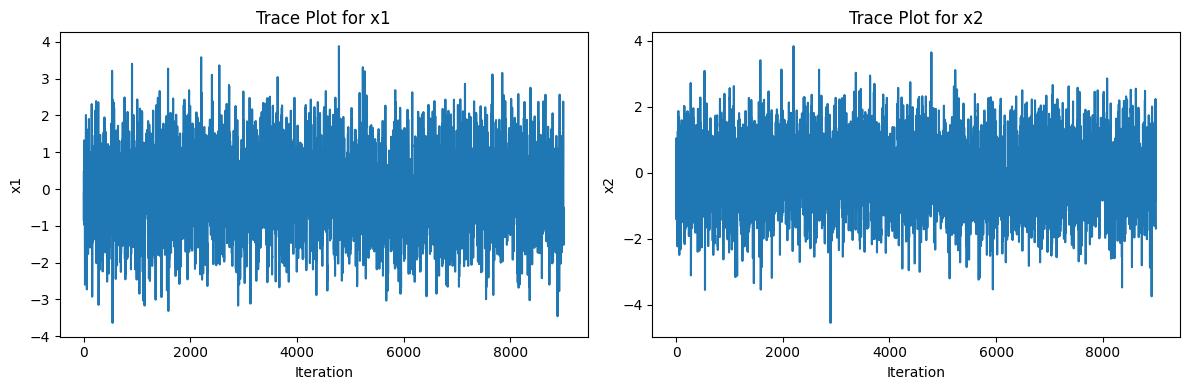

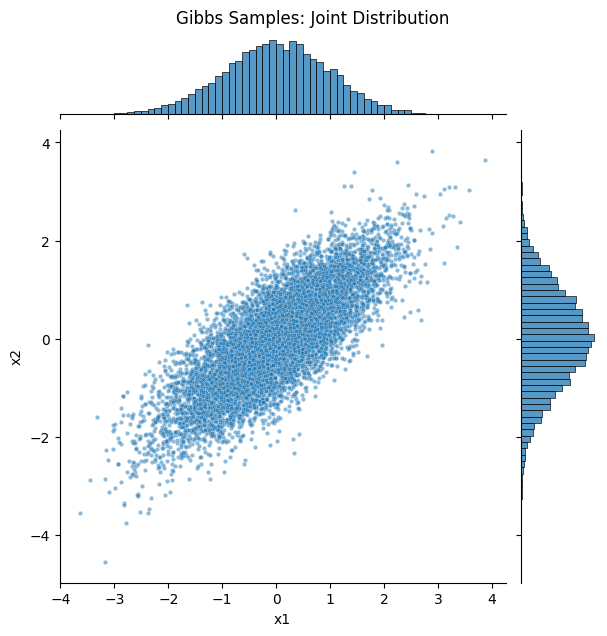

In [4]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(samples[:, 0])
plt.title('Trace Plot for x1')
plt.xlabel('Iteration')
plt.ylabel('x1')

plt.subplot(1, 2, 2)
plt.plot(samples[:, 1])
plt.title('Trace Plot for x2')
plt.xlabel('Iteration')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

# Joint distribution
sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind='scatter', s=10, alpha=0.5)
plt.suptitle('Gibbs Samples: Joint Distribution', y=1.02)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 5. Compare Sample Mean and Covariance to Theoretical Values

In [8]:
target_mean = np.array([mu1, mu2])
target_cov = np.array([[sigma1**2, rho*sigma1*sigma2], [rho*sigma1*sigma2, sigma2**2]])
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

print(f"Target mean: {target_mean}")
print(f"Sample mean: {sample_mean}")
print(f"Target covariance:{target_cov}")
print(f"Sample covariance:\n{sample_cov}")
print(f"Correlation coefficient: {rho}")

Target mean: [0 0]
Sample mean: [-0.00176013 -0.00701235]
Target covariance:[[1.  0.8]
 [0.8 1. ]]
Sample covariance:
[[0.98301516 0.77703805]
 [0.77703805 0.97249854]]
Correlation coefficient: 0.8


The sample mean and covariance should be close to the theoretical values as the number of samples increases.